# Marvel Heroes (Using CNN)

In [ ]:
import os
import zipfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

### (1) 데이터 로드
구글 drive mount.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content/drive'

데이터가 있는 디렉토리로 이동.

marvel 디렉토리에 저장된 학습 이미지는 black_widow, spiderman, captain america 각각 200~300개 정도, 전체 745개

In [ ]:
black_widow_dir = os.path.join('/marvel/train/black_widow')
spider_man_dir = os.path.join('/marvel/train/spider-man')
captain_america_dir = os.path.join('/marvel/train/captain_america')

print('total training black widow images:', len(os.listdir(black_widow_dir)))
print('total training spiderman images:', len(os.listdir(spider_man_dir)))
print('total training captain america images:', len(os.listdir(captain_america_dir)))

total training black widow images: 206
total training spiderman images: 300
total training captain america images: 239


In [ ]:
black_widow_files = os.listdir(blackwidow_dir)
print(black_widow_files[:5])

spider_man_files = os.listdir(spiderman_dir)
print(spider_man_files[:5])

captain_america_files = os.listdir(captainamerica_dir)
print(captain_america_files[:5])

['pic_034.jpg', 'pic_028.jpg', 'pic_027.jpg', 'pic_025.jpg', 'pic_048.jpg']
['pic_070.jpg', 'pic_069.jpg', 'pic_066.jpg', 'pic_065.jpg', 'pic_064.jpg']
['pic_005.jpg', 'pic_004.jpg', 'pic_003.jpg', 'pic_002.jpg', 'pic_017.jpg']


 디렉토리에 저장된 테스트 이미지는 black widow, spiderman, captain america  전체 109개|

In [ ]:
black_widow_test_dir = os.path.join('/marvel/valid/black_widow')
spider_man_test_dir = os.path.join('/marvel/valid/spider-man')
captain_america_test_dir = os.path.join('/marvel/valid/captain_america')

print('total testing rock images:', len(os.listdir(black_widow_test_dir)))
print('total testing scissors images:', len(os.listdir(spider_man_test_dir)))
print('total testing paper images:', len(os.listdir(captain_america_test_dir)))

total testing rock images: 24
total testing scissors images: 52
total testing paper images: 33


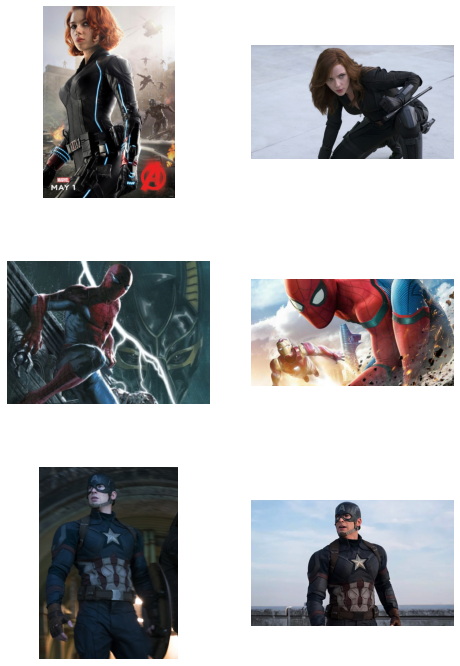

In [ ]:
rps = 3
pic_index = 2

next_black_widow = [os.path.join(black_widow_dir, fname) for fname in black_widow_files[:pic_index]]
next_spider_man = [os.path.join(spider_man_dir, fname) for fname in spider_man_files[:pic_index]]
next_captain_america = [os.path.join(captain_america_dir, fname) for fname in captain_america_files[:pic_index]]

fig = plt.gcf()
fig.set_size_inches(pic_index*4, rps*4)

for i, img_path in enumerate(next_black_widow  + next_spider_man + next_captain_america):
  sp = plt.subplot(rps, pic_index, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

### (2) Data Augmentation

In [ ]:
TRAINING_DIR = "/marvel/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
        rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
  batch_size=74
)

Found 745 images belonging to 3 classes.


테스트 데이터는 스케일만 변경

In [ ]:
VALIDATION_DIR = "/marvel/valid"
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
  batch_size=36
)

Found 109 images belonging to 3 classes.


### (3) model define

In [ ]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 128)      

### (4) model compile

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

batch * steps_per_epoch = image 개수
train, valid 따로 맞춰줘야함.

### (5) 모델 학습

In [ ]:
history = model.fit(
    train_generator, 
    epochs=50, 
    steps_per_epoch=10, 
    validation_data = validation_generator, 
    verbose = 1, 
    validation_steps=3)

Epoch 1/50
10/10 [==============================] - 17s 1s/step - loss: 1.1146 - accuracy: 0.4042 - val_loss: 1.0595 - val_accuracy: 0.4722
Epoch 2/50
10/10 [==============================] - 15s 1s/step - loss: 1.0506 - accuracy: 0.4192 - val_loss: 0.9280 - val_accuracy: 0.4815
Epoch 3/50
10/10 [==============================] - 15s 1s/step - loss: 0.9742 - accuracy: 0.4872 - val_loss: 1.0504 - val_accuracy: 0.4537
Epoch 4/50
10/10 [==============================] - 14s 1s/step - loss: 1.0113 - accuracy: 0.5226 - val_loss: 0.8303 - val_accuracy: 0.6019
Epoch 5/50
10/10 [==============================] - 15s 2s/step - loss: 1.0152 - accuracy: 0.5777 - val_loss: 0.8096 - val_accuracy: 0.5648
Epoch 6/50
10/10 [==============================] - 15s 2s/step - loss: 0.9105 - accuracy: 0.5596 - val_loss: 0.8162 - val_accuracy: 0.6389
Epoch 7/50
10/10 [==============================] - 15s 1s/step - loss: 0.8699 - accuracy: 0.5997 - val_loss: 0.8693 - val_accuracy: 0.6111
Epoch 8/50
10/10 [==

### (5) model evaluate (Loss & Accuracy)

Text(0.5, 1.0, 'Training and validation loss')

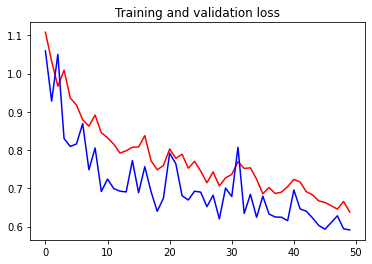

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title ('Training and validation loss')

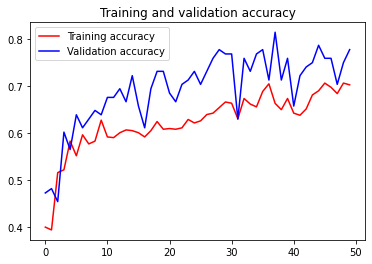

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

<strong>모델 학습 후기</strong>

- 데이터의 양이 많지 않았고 데이터가 여러 인물이 섞여있는 경우도 있고 사진마다 캐릭터의 상태가 많이 바뀌는 경우가 많아서 성능이 좋지 않다.
- 더 많은 데이터와 깔끔한 데이터를 사용해야한다.
- 다른 캐릭터들도 추후에 진행해보겠다.